Libraries imported successfully
Dataset loaded: 140 rows, 18 columns

   Age  Gender  StudyHours  SleepHours  ReviewCenter  MockExamScore   GPA  \
0   23  Female          13           6             1           64.0  1.50   
1   22  Female          12           6             1           75.0  1.50   
2   23    Male          10           7             1           87.0  1.50   
3   23  Female           8           8             1           80.0  1.25   
4   24  Female           3           6             1           82.0  1.50   

   Scholarship  InternshipGrade IncomeLevel EmploymentStatus  Confidence  \
0            1              NaN      Middle     Professional           4   
1            0              1.5         Low          Skilled           4   
2            0              1.5         Low       Unemployed          10   
3            0              NaN      Middle          Skilled           9   
4            1              NaN      Middle       Unemployed           6   

   TestAnx

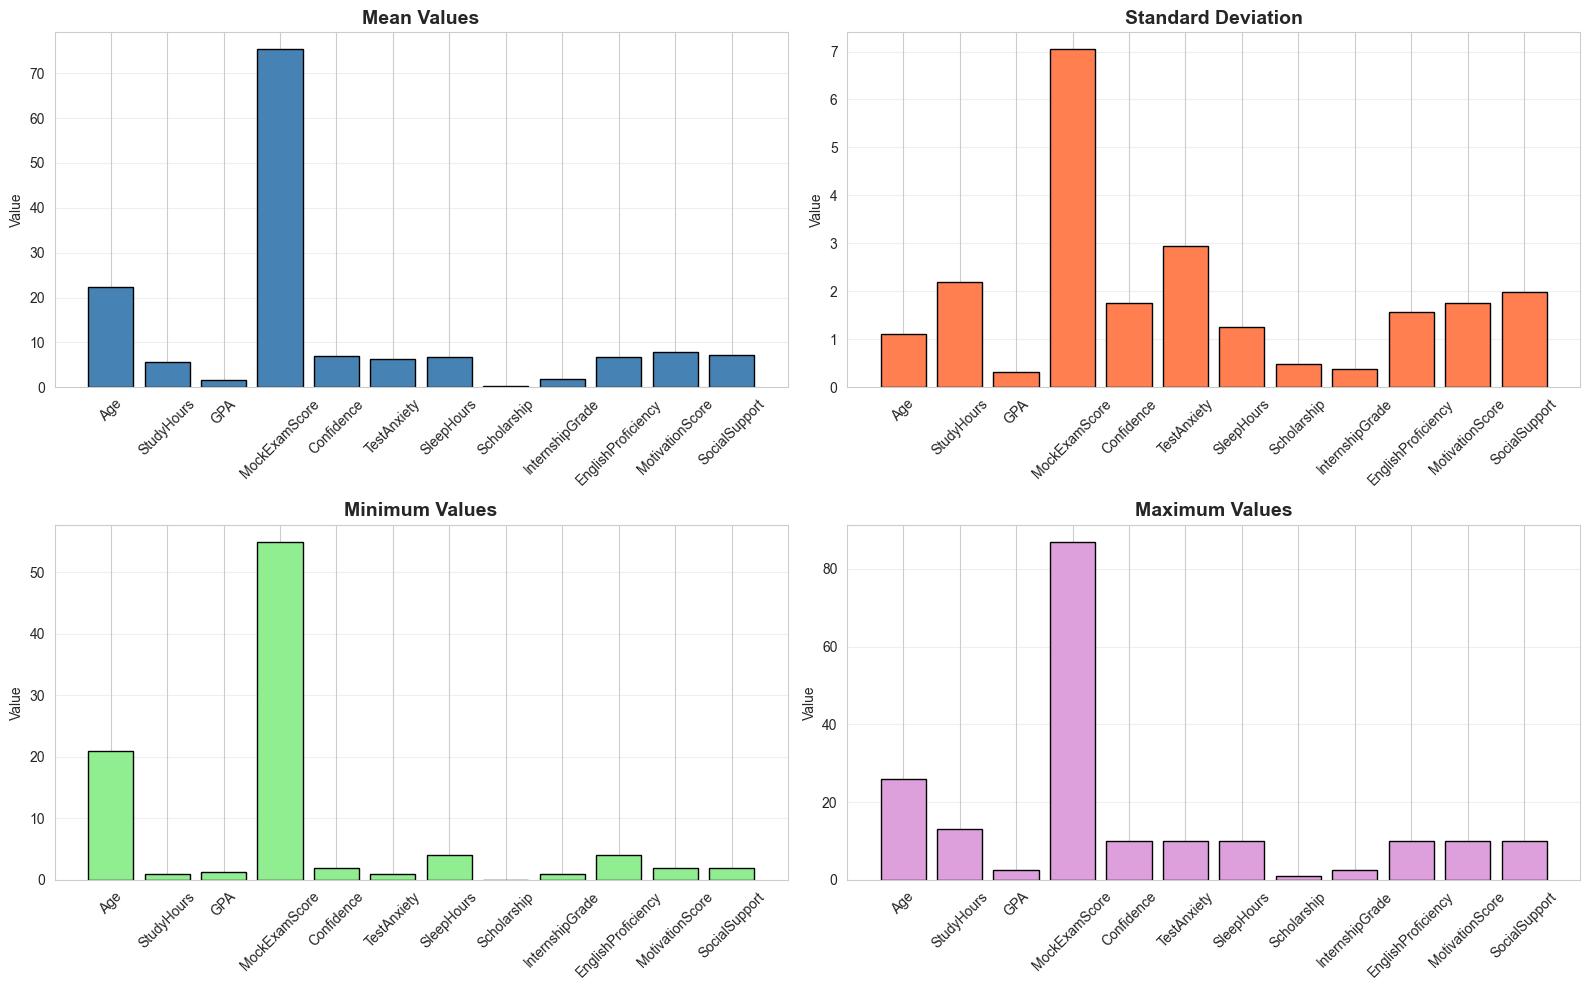

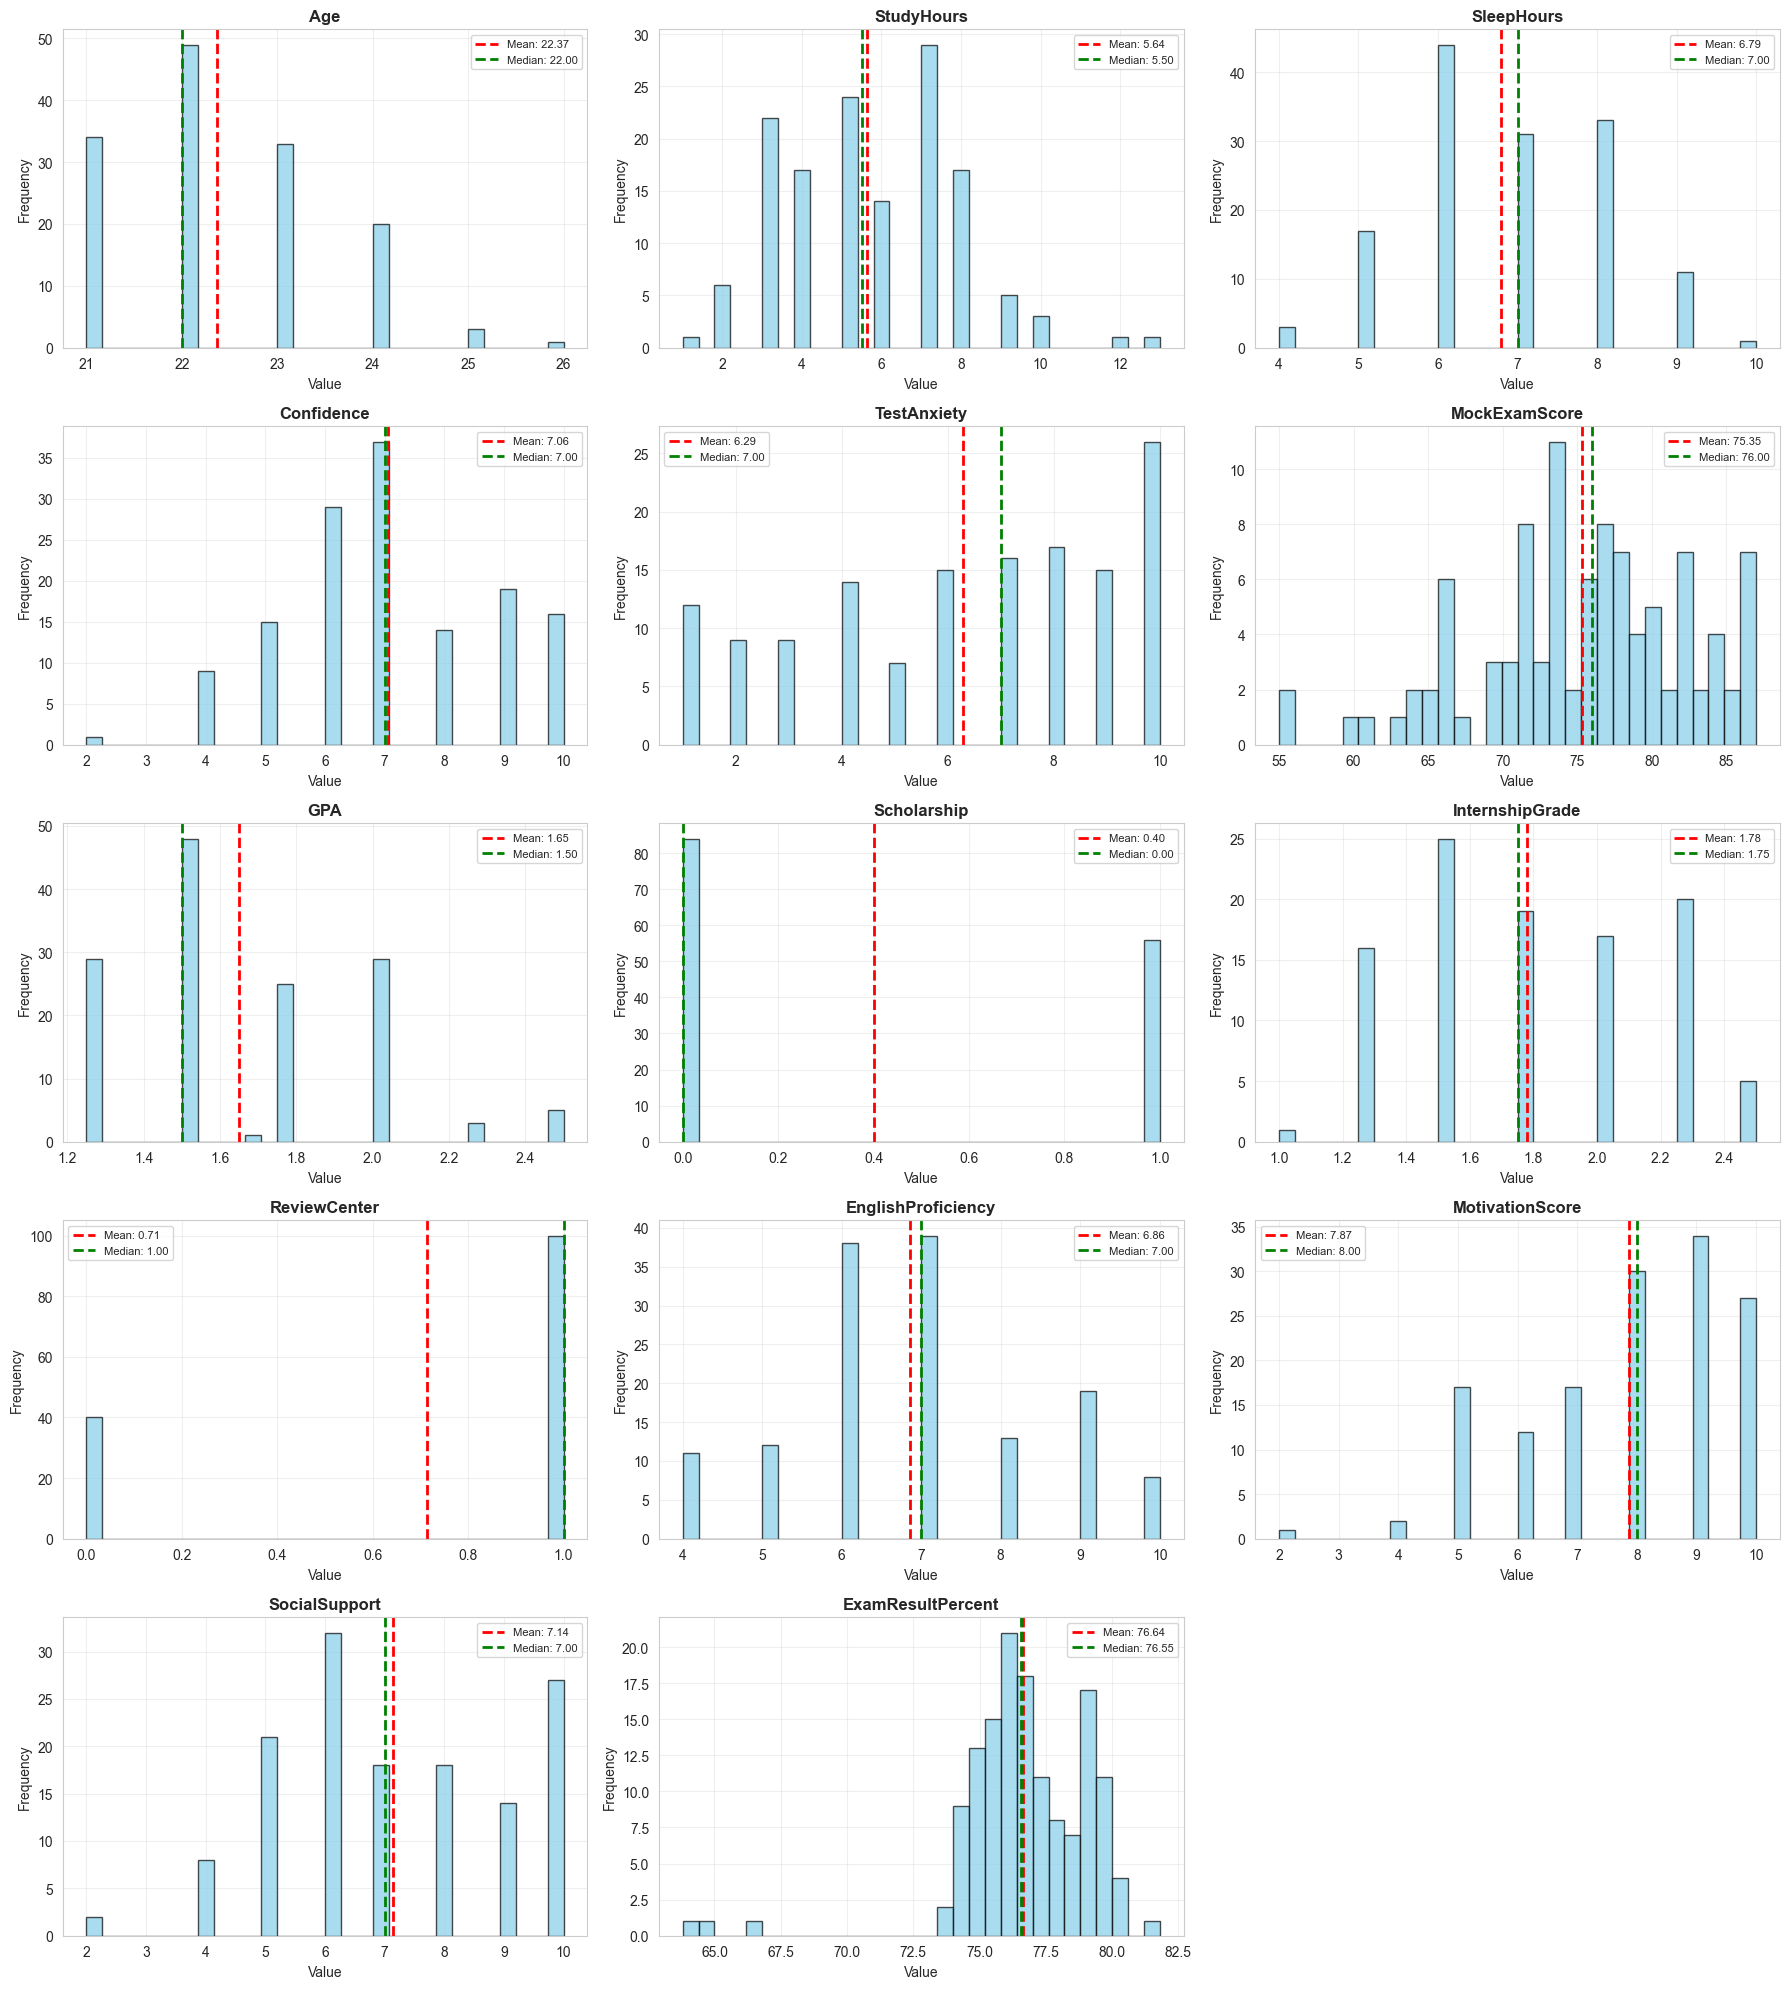

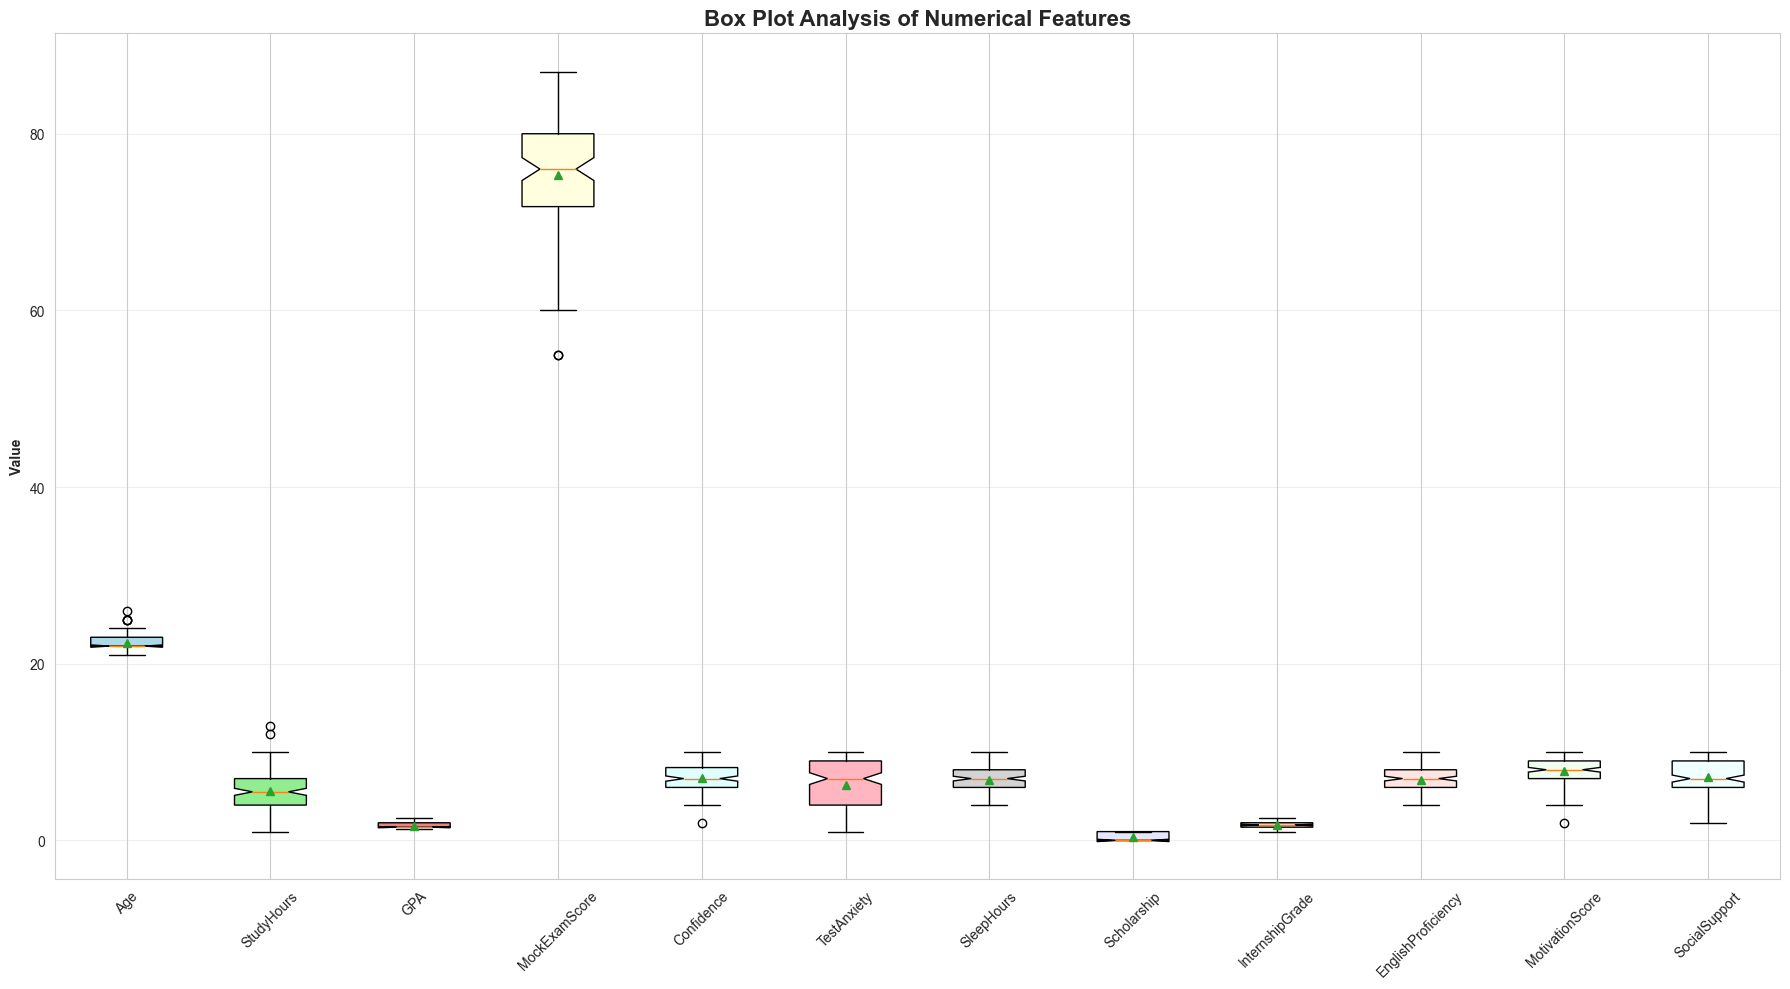

Descriptive statistics saved to ../processed_data/descriptive_statistics_dataset.csv
Text report saved to ../processed_data/descriptive_statistics_report.txt

DESCRIPTIVE STATISTICS ANALYSIS COMPLETE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print('Libraries imported successfully')

df = pd.read_csv('../data/social_work_exam_dataset.csv')
print(f'Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns\n')
print(df.head())

print('=' * 80)
print('DESCRIPTIVE STATISTICS SUMMARY')
print('=' * 80)

numerical_features = ['Age', 'StudyHours', 'SleepHours', 'Confidence', 'TestAnxiety',
                     'MockExamScore', 'GPA', 'Scholarship', 'InternshipGrade', 
                     'ReviewCenter', 'EnglishProficiency', 'MotivationScore', 
                     'SocialSupport', 'ExamResultPercent']

stats_df = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': [df[col].mean() for col in numerical_features],
    'Std. Dev.': [df[col].std() for col in numerical_features],
    'Min': [df[col].min() for col in numerical_features],
    'Max': [df[col].max() for col in numerical_features]
})

print('\n')
print(stats_df.to_string(index=False))
print('\n' + '=' * 80)

print('\nCATEGORICAL FEATURES DISTRIBUTION')
print('=' * 80)

categorical_features = ['Gender', 'IncomeLevel', 'EmploymentStatus', 'Passed']

for feature in categorical_features:
    print(f'\n{feature}:')
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    
    for value in counts.index:
        print(f'   {value}: {counts[value]} ({percentages[value]:.2f}%)')
    print('-' * 60)

print('\nTARGET VARIABLE STATISTICS (ExamResultPercent)')
print('=' * 80)
print(f'   Mean:      {df["ExamResultPercent"].mean():.2f}')
print(f'   Std. Dev.: {df["ExamResultPercent"].std():.2f}')
print(f'   Min:       {df["ExamResultPercent"].min():.2f}')
print(f'   Max:       {df["ExamResultPercent"].max():.2f}')
print(f'   Median:    {df["ExamResultPercent"].median():.2f}')
print(f'   Q1:        {df["ExamResultPercent"].quantile(0.25):.2f}')
print(f'   Q3:        {df["ExamResultPercent"].quantile(0.75):.2f}')
print('=' * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

plot_features = ['Age', 'StudyHours', 'GPA', 'MockExamScore', 'Confidence', 'TestAnxiety',
                'SleepHours', 'Scholarship', 'InternshipGrade', 'EnglishProficiency', 
                'MotivationScore', 'SocialSupport']

axes[0, 0].bar(plot_features, [df[col].mean() for col in plot_features], 
               color='steelblue', edgecolor='black')
axes[0, 0].set_title('Mean Values', fontweight='bold', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylabel('Value')

axes[0, 1].bar(plot_features, [df[col].std() for col in plot_features], 
               color='coral', edgecolor='black')
axes[0, 1].set_title('Standard Deviation', fontweight='bold', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylabel('Value')

axes[1, 0].bar(plot_features, [df[col].min() for col in plot_features], 
               color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Minimum Values', fontweight='bold', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_ylabel('Value')

axes[1, 1].bar(plot_features, [df[col].max() for col in plot_features], 
               color='plum', edgecolor='black')
axes[1, 1].set_title('Maximum Values', fontweight='bold', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))

bp = plt.boxplot([df[col].dropna() for col in plot_features],
                 labels=plot_features,
                 patch_artist=True,
                 notch=True,
                 showmeans=True)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightcyan',
          'lightpink', 'lightgray', 'lavender', 'peachpuff', 'mistyrose', 
          'honeydew', 'azure']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Box Plot Analysis of Numerical Features', fontweight='bold', fontsize=16)
plt.ylabel('Value', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

output_dir = '../processed_data'
os.makedirs(output_dir, exist_ok=True)

stats_df.to_csv(f'{output_dir}/descriptive_statistics_dataset.csv', index=False)
print(f'Descriptive statistics saved to {output_dir}/descriptive_statistics_dataset.csv')

with open(f'{output_dir}/descriptive_statistics__dataset_report.txt', 'w') as f:
    f.write('DESCRIPTIVE STATISTICS REPORT\n')
    f.write('=' * 80 + '\n\n')
    f.write(f'Dataset: social_work_exam_dataset.csv\n')
    f.write(f'Total Records: {df.shape[0]}\n')
    f.write(f'Total Features: {df.shape[1]}\n\n')
    f.write('NUMERICAL FEATURES STATISTICS\n')
    f.write('-' * 80 + '\n')
    f.write(stats_df.to_string(index=False))
    f.write('\n\n')

print(f'Text report saved to {output_dir}/descriptive_statistics_report.txt')
print('\nDESCRIPTIVE STATISTICS ANALYSIS COMPLETE')